# Regressão Logística - Regularização

Trabalho referente ao segundo crédito da disciplina CET 064 - Aquisição de Conhecimento.
<br>
<br>
Para a regressão, será utilizado o dataframe *[titanic](https://www.kaggle.com/competitions/titanic/data)*.
<br>
<br>
O dataframe já foi baixado e se encontra em: */segundo-credito-parte-B/database/raw/*
<br>
<br>
Este ralatório foi implementado seguindo o exemplo de [Prof. Dr. Mst. Neylson Crepalde](https://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/)

## Sumário

- [Objetivos](#objetivos)


- [Implementação](#implementação-da-regressão-logística)


- [DataFrame](#salvando-o-dataframe-em-uma-variável)


- [Funcao_Auxiliar_Para_Impressão](#função-auxiliar-para-impressão-de-gráficos-barra)

- [Testes_Com_Colunas](#verificando-quantas-pessoas-faleceram-e-quantas-pessoas-sobreviveram-ao-acidente)

- [Objetivo-A](#objetivo-a)

- [Objetivo-B](#objetivo-b)

- [Objetivo-C](#objetivo-c)

## Objetivos:

<p><b>A)</b> implementar um modelo de regressão logística;</p>
<p><b>B)</b> Testar diferentes parametros que aplicam a regularização do modelo, buscando o melhor deles (a regularização é setada, principalmente pelo parametro penality);</p>
<p><b>C)</b> Gerar um relatório explicando como funcionam as regularizações lasso e ridge; qual das escolhas de parametros gerou melhor resultado.</p>
<p><b>OBS</b>: use todas as variáveis que achar ser significativa (pelo menos 4 variáveis), nao precisamos, nesse trabalho, de um método sofisticado para seleção de features e etc. FOCO no método de regularização.</p>
<p><b>OBS<sub>2</sub></b>: os dados de competição do kaggle não tem rotulação para o conjunto de testes. Vocês podem dividir 20% do conjunto de treino para fazer teste. Lembrando que métodos de regularização são bons para evitar overfitting. Então é interessante obter o erro do conjunto e treino x conjunto de teste.</p>

## Implementação da regressão Logística

### Importando pacotes e bibliotecas necessárias

In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from scipy.optimize import fmin_tnc

### Salvando o dataframe em uma variável

In [79]:
df_titanic_raw = pd.read_csv("../database/raw/titanic-train.csv", sep = ",", index_col = "PassengerId")

#### Imprimindo as 10 primeiras linhas do dataframe carregado

In [80]:
df_titanic_raw.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Função auxiliar para impressão de gráficos barra

In [81]:
def imprime_grafico_contagem(dados: pd.Series, nome_coluna: str, x_label: str = None, titulo: str = None) -> None:
    if nome_coluna == None:
        raise Exception
    
    plt.figure(figsize = (12, 8))
    sns.countplot(df_titanic_raw, x = nome_coluna)
    
    if titulo != None:
        plt.title(titulo)
    
    plt.ylabel("Contagem")
    
    if x_label != None:
        plt.xlabel(x_label)
    
    plt.show()
    

### Verificando a coluna *Survived*

In [82]:
print((df_titanic_raw.Survived.value_counts() / df_titanic_raw.shape[0]) * 100)

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64


**0** - É a classificação das pessoas que faleceram.
<br>
<br>
**1** - É a classificação das pessoas que sobreviveram.
<br>
<br>
Podemos notar, então, que aproximadamente 61,62% de todas as pessoas que embarcaram faleceram no acidente.

#### Imprimindo em formato visual

A função *imprime_grafico_contagem* será utilizada para a impressão

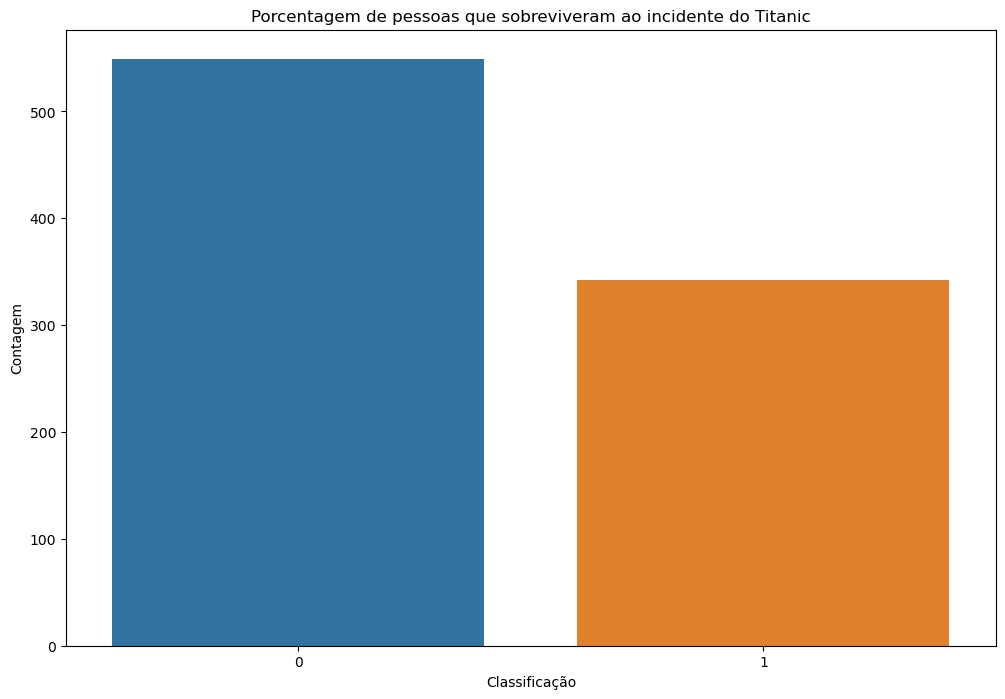

In [83]:
imprime_grafico_contagem(df_titanic_raw, "Survived", "Classificação", "Porcentagem de pessoas que sobreviveram ao incidente do Titanic")

### Verificando a coluna *Pclass*

In [84]:
print((df_titanic_raw.Pclass.value_counts() / df_titanic_raw.shape[0]) * 100)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


**1** - É a classificação das pessoas que estavam viajando na 1<sup>a</sup> classe.
<br>
<br>
**2** - É a classificação das pessoas que estavam viajando na 2<sup>a</sup> classe.
<br>
<br>
**3** - É a classificação das pessoas que estavam viajando na 3<sup>a</sup> classe.
<br>
<br>
Podemos notar, então, que aproximadamente 55,1% de todas as pessoas que estavam a bordo do titanic estavam viajando na terceira classe.
<br>
<br>
Podemos notar também que a minoria das pessoas, aproximadamente 20,65% das pessoas, estavam viajando na segunda classe.

#### Imprimindo em formato visual

A função *imprime_grafico_contagem* será utilizada para a impressão

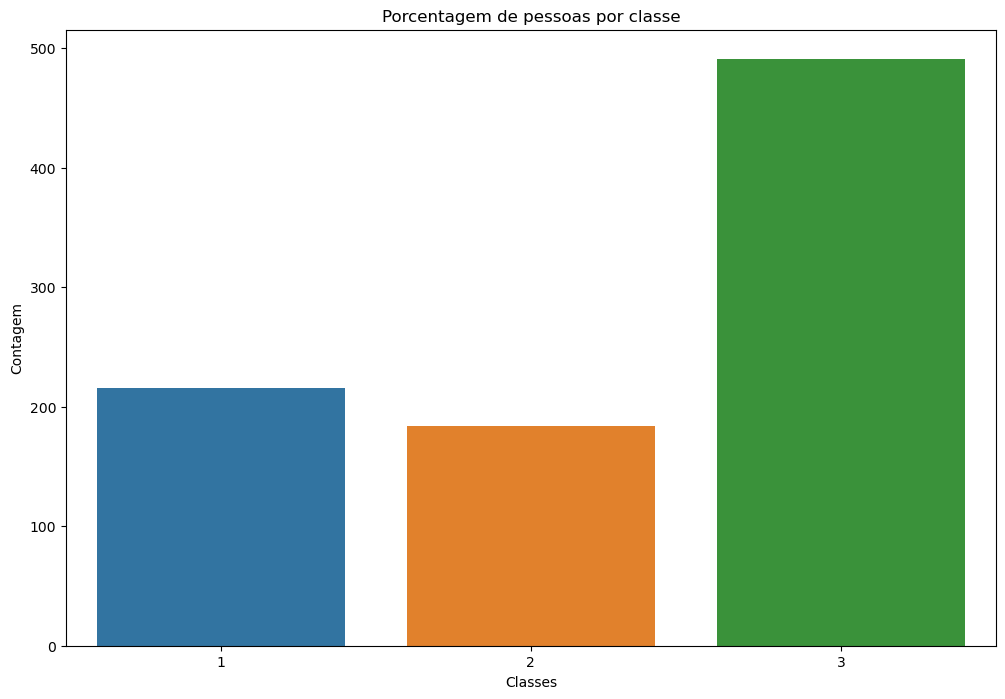

In [85]:
imprime_grafico_contagem(df_titanic_raw, "Pclass", "Classes", "Porcentagem de pessoas por classe")

### Verificando a coluna *Sex*

In [86]:
print((df_titanic_raw.Sex.value_counts() / df_titanic_raw.shape[0]) * 100)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


Podemos notar, então, que a grande maioria, aproximadamente 64,76% de todas as pessoas que estavam a bordo do titanic, eram do sexo masculino (*male*).

#### Imprimindo em formato visual

A função *imprime_grafico_contagem* será utilizada para a impressão

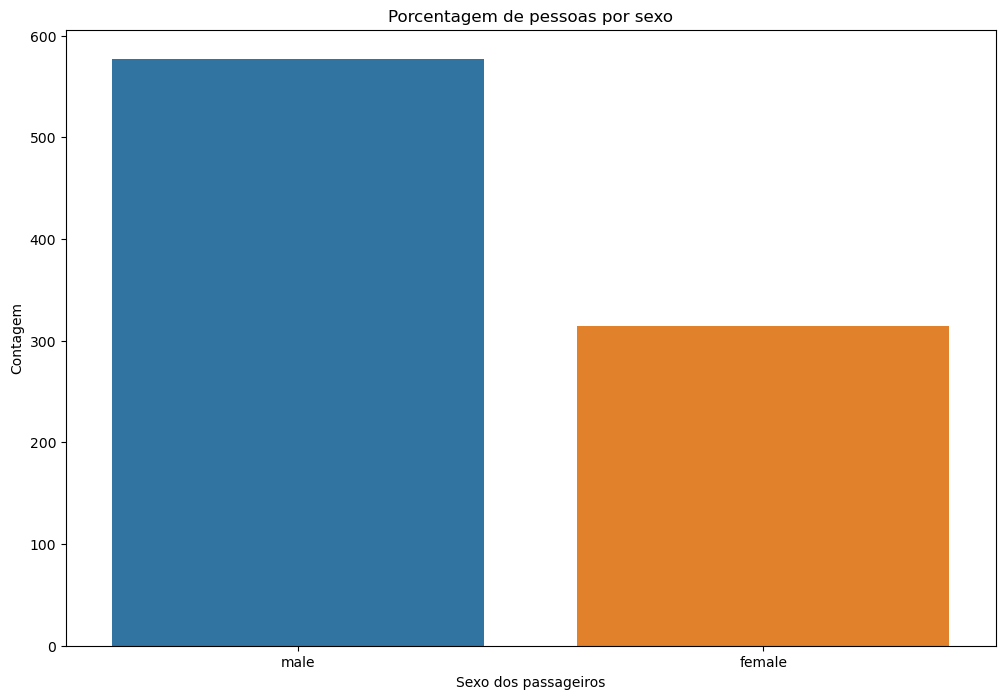

In [87]:
imprime_grafico_contagem(df_titanic_raw, "Sex", "Sexo dos passageiros", "Porcentagem de pessoas por sexo")

### Verificando a coluna *Age*

Verificando valores estatísticos da coluna *Age*

In [88]:
df_titanic_raw.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Podemos notar que a média de idade dos passageiros era de 29 anos.
<br>
<br>
Havia bebês a bordo (pessoas com menos de 1 ano de vida).
<br>
<br>
A pessoa mais velha a bordo tinha 80 anos de vida.
<br>
<br>
A media aritmética está deslocada em relação a mediana. A média é de 29 anos enquanto a mediana é de 28 anos.

#### Distribuição de idade por sexo dos passageiros

Vamos verificar a idade dos passageiros dado seu sexo.

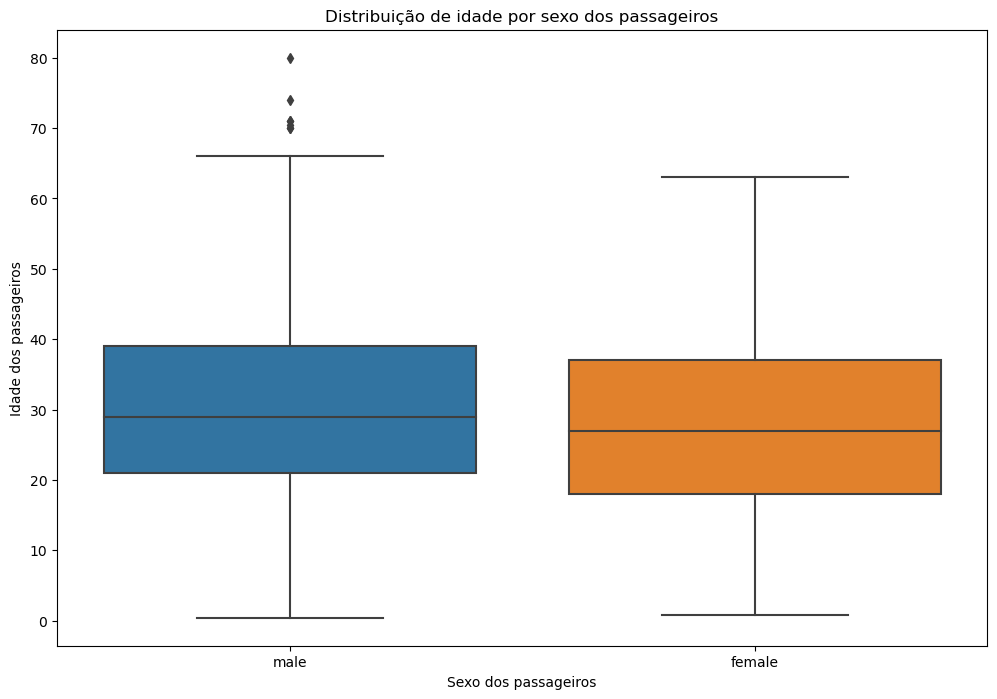

In [89]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df_titanic_raw, x = "Sex", y = "Age")
plt.title("Distribuição de idade por sexo dos passageiros")
plt.xlabel("Sexo dos passageiros")
plt.ylabel("Idade dos passageiros")
plt.show()

Podemos, então, ver graficamente que os homens a bordos eram, em sua maioria, mais velhos que as mulheres.
<br>
<br>
Podemos notar que em ambos casos, a mediana está deslocada em direção ao primeiro quartil, não sendo igual à média aritmética.
<br>
<br>
Podemos notar que somente o sexo masculino possuem valores outliers.

## Objetivo A

Neste objetivo, será implementado um modelo de regressão logistica.

### Primeiro passo: implementação das funções auxiliares

#### Funcao sigmóide

A função sigmóide é a função que retorna o resultado de:
<br>
1 / (1 - e^(-h(x)))
<br>
<br>
Seu comportamento pode ser visto na imagem abaixo:
<br>
<br>
![funcaoSigmoide](img/funcaoSigmoide.png)
<br>
<br>
Será utilizada como uma função de ativação que mapeia qualquer número real entre 0 e 1.

In [90]:
def funcao_sigmoide(x:float) -> float:
    return 1 / (1 + np.exp(-x))


#### Função para computar a soma dos pesos das entradas 

A função recebe duas listas ***x*** e ***theta(θ)*** como parâmetros.
<br>
<br>
Seu retorno é uma lista com os pesos para a regressão logística.

In [91]:
def funcao_soma_dos_pesos(theta:list, x:list) -> list:
    return np.dot(x, theta)


#### Função para calcular a probabilidade após a passagem pela função sigmóide

In [92]:
def funcao_de_probabilidade(theta:list, x:list) -> float:
    return funcao_sigmoide(funcao_soma_dos_pesos(theta, x))


### Segundo passo: implementação das funções principais

#### Função de custo

A função de custo definida por:
<br>
<br>
![funcaoCusto](img/oCusto.png)
<br>
<br>
<br>
Pode ser implementada seguindo o modelo:
<br>
<br>
![funcaoDeCusto](img/funcaoCusto.png)
<br>
<br>
<br>
Para sua implementação, serão utilizadas as funções definidas acima.

In [93]:
def funcao_de_custo(theta:list, x:list, y:list) -> float:
    tamanho = x.shape[0]
    custo_total = -(1 / tamanho) * np.sum(
        y * np.log(funcao_de_probabilidade(theta, x)) + (1 - y) * np.log(1 - funcao_de_probabilidade(theta, x))
    )
    return custo_total


#### Função gradiente

A função gradiente é definida por:
<br>
<br>
![funcaoGradiente](img/funcaoGradiente.png)
<br>
<br>
<br>
Computa o gradiente da função de custo sobre o ponto theta.

In [94]:
def funcao_gradiente(theta:list, x:list, y:list) -> float:
    tamanho = x.shape[0]
    return (1 / tamanho) * np.dot(x.T, funcao_sigmoide(funcao_soma_dos_pesos(theta,   x)) - y)


#### Função da regressão

A função da regressãoa será a rotina que irá chamar todas as outras funções implementadas anteriormente e realizar a regressões logística.

Seu retorno será uma lista composta pelos parâmetros theta.

In [97]:
def funcao_fit(x:list, y:list, theta):
    opt_weights = fmin_tnc(func = funcao_de_custo, x0 = theta, fprime = funcao_gradiente, args = (x, y))
    return opt_weights[0]


### Terceiro passo: testar modelo implementado

O modelo implementado pela soma das funções acima será testado com as colunas do dataFrame Titanic

In [99]:
x = df_titanic_raw.Parch.copy()
x = np.c_[np.ones((x.shape[0], 1)), x]
theta = np.zeros((x.shape[1], 1))

parametros_theta = funcao_fit(x, df_titanic_raw.Survived, theta)
parametros_theta

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.36459369E-02
    1    3  6.676103436821669E-01   1.38259933E-03
tnc: fscale = 26.8938
    2    5  6.633922405883220E-01   3.68321082E-04
    3    7  6.626551295800301E-01   2.42234544E-06
tnc: fscale = 642.513
    4    9  6.626505098475828E-01   2.42469905E-07
    5   11  6.626496461430771E-01   2.54907519E-13
tnc: |pg| = 7.85795e-10 -> local minimum
    5   11  6.626496461430771E-01   2.54907519E-13
tnc: Local minima reach (|pg| ~= 0)


array([-0.55304995,  0.20331433])

## Objetivo B

Neste objetivo, serão testados diferentes parametros que aplicam a regularização do modelo, em busca do melhor deles.
<br>
<br>
Serão utilizados para a regressão 5 colunas:
- Pclass
- Survived
- SibSp
- Parch
- Embarked
<br>
<br>
<br>
<p>Sendo *Survived* a coluna objetivo, o Y o qual nós queremos prever.</p>

### Criando o modelo

In [ ]:
modelo_L1 = LogisticRegression("l1", solver = "liblinear")
modelo_L2 = LogisticRegression("l2", solver = "newton-cg")

Sendo *modelo_L1* o modelo que utiliza a regularização Lasso. *modelo_L2* é o modelo que utiliza a regularização Ridge.
<br>
<br>
A função de penalidade L2 utiliza a soma dos quadrados dos parametros e Ridge Regression tenta forçar esta soma a ser pequena.
<br>
<br>
A função de penalidade L1 utiliza a soma dos valores absolutos dos parametros e Lasso tenta forçar esta soma a ser pequena.

### Criando novo dataFrame com menos dados faltantes a partir do dataFrame original

Somente as colunas mencionadas acima serão salvas no novo dataFrame

In [ ]:
df_titanic_processed = df_titanic_raw[["Pclass", "Survived", "SibSp", "Parch", "Embarked"]].dropna()
df_titanic_processed

,Pclass,Survived,SibSp,Parch,Embarked
PassengerId,,,,,
1,3,0,1,0,S
2,1,1,1,0,C
3,3,1,0,0,S
4,1,1,1,0,S
5,3,0,0,0,S
...,...,...,...,...,...
887,2,0,0,0,S
888,1,1,0,0,S
889,3,0,1,2,S


### Convertendo os dipos das colunas para o tipo *category*

O tipo category será utilizado para realizar a regressão logística

In [ ]:
df_titanic_processed["Pclass"] = df_titanic_processed["Pclass"].astype("category")
df_titanic_processed["Survived"] = df_titanic_processed["Survived"].astype("category")
df_titanic_processed["SibSp"] = df_titanic_processed["SibSp"].astype("category")
df_titanic_processed["Parch"] = df_titanic_processed["Parch"].astype("category")
df_titanic_processed["Embarked"] = df_titanic_processed["Embarked"].astype("category")
df_titanic_processed.dtypes

Pclass      category
Survived    category
SibSp       category
Parch       category
Embarked    category
dtype: object

### Realizando a Regressão Logística

#### Definindo Y

Como explicado antes, a coluna *Survived* será o valor que queremos predizer, o seja, será nosso Y

In [ ]:
y = df_titanic_processed["Survived"]
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 889, dtype: category
Categories (2, int64): [0, 1]

#### Definindo x

Vamos utilizar as colunas restantes como nosso X

In [ ]:
x = pd.get_dummies(df_titanic_processed[["Pclass", "SibSp", "Parch", "Embarked"]], drop_first = True)
x

,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
889,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True


#### Regressão com o Modelo L1

##### Separando o dataframe em treino e teste

<p>Será utilizado Lasso como parâmetro de penalização.</p>
<p>O tamanho do teste será de 0.2 (20%).</p>
<p>O tamanho do treino será de 0.2 (20%).</p>
<p>Será utilizando o parâmetro <i><b>shuffle</b></i> como verdadeiro (True) para embaralhar os dados antes da divisão ser realizada.</p>

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, train_size = 0.2, shuffle = True)

##### Realizando o fit do modelo

In [ ]:
modelo_L1.fit(x_treino, y_treino)

LogisticRegression(penalty='l1', solver='liblinear')

Imprimindo os coeficientes

In [ ]:
parametros = modelo_L1.coef_
parametros

array([[ 0.05909211, -1.39701882,  0.20081937,  0.77550212,  0.        ,
         0.        ,  0.        ,  0.        ,  0.05765728,  0.93349969,
         0.        ,  0.        ,  0.        ,  0.        ,  1.26920008,
        -0.66920974]])

Imprimindo as classes preditas

In [ ]:
classes_preditas = modelo_L1.predict(x_teste)
classes_preditas

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0])

Imprimindo o erro da previsão

In [ ]:
mean_squared_log_error(y_teste, classes_preditas, squared = False)

0.405770413368479

Imprimindo a acurácia

In [ ]:
acuracia = accuracy_score(y_teste, classes_preditas)
acuracia

0.6573033707865169

Após a regressão logística, temos que:
- a acurácia do modelo é de aproximadamente 60%;
<br>
<br>
- seu erro quadrático é de aproximadamente 0,44; e
<br>
<br>
- os parâmetros do modelos são: [ -0.43295971, -1.06317748,  0, -0.54602163, 0, -0.62353808, 0, 0, 0, 1.17656566, 0, 0, 0, 0, 0, 0 ]

#### Regressão com o Modelo L2

##### Separando o dataframe em treino e teste

<p>Será utilizado Ridge como parâmetro de penalização.</p>
<p>O tamanho do teste será de 0.2 (20%).</p>
<p>O tamanho do treino será de 0.2 (20%).</p>
<p>Será utilizando o parâmetro <i><b>shuffle</b></i> como verdadeiro (True) para embaralhar os dados antes da divisão ser realizada.</p>

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, train_size = 0.2, shuffle = True)

##### Realizando o fit do modelo

In [ ]:
modelo_L2.fit(x_treino, y_treino)

LogisticRegression(solver='newton-cg')

Imprimindo os coeficientes

In [ ]:
parametros = modelo_L2.coef_
parametros

array([[-0.43412429, -1.11554077,  0.19081851,  0.32943866, -0.74720319,
        -0.47026947,  0.        , -0.34796029,  1.2117111 , -0.00140647,
        -0.22413362, -0.22413362,  0.33054822,  0.        ,  0.93431521,
         0.15458512]])

Imprimindo as classes preditas

In [ ]:
classes_preditas = modelo_L2.predict(x_teste)
classes_preditas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1])

Imprimindo o erro da previsão

In [ ]:
mean_squared_log_error(y_teste, classes_preditas, squared = False)

0.4123687389172673

Imprimindo a acurácia

In [ ]:
acuracia = accuracy_score(y_teste, classes_preditas)
acuracia

0.6460674157303371

Após a regressão logística, temos que:
- a acurácia do modelo é de aproximadamente 74%;
<br>
<br>
- seu erro quadrático é de aproximadamente 0,36; e
<br>
<br>
- os parâmetros do modelos são: [ -0.37708799, -1.62090996,  0.88759758,  0.0566424 , -0.20448603, -0.7759205, -0.33197834, -0.33197834, 0.47008569, 0.33825823, 0.30636232, -0.26862171, 0, 0, 0.1589566, -0.79677344 ]

## Objetivo C

Neste tópico, serão explicado como funcionam as regularizações lasso e ridge, e qual das escolhas de parametros gerou melhor resultado.

### Ideias gerais

Lasso e Ridge são parâmetros de penalidade para a regressão logística.

Ambos são técnicas poderosas utilizada para criação de modelos parcimoniosos com a presença de grande quantidade de features (colunas).


Neste caso, grande quantidade de dados significa:
1. grandes o suficiente para tendenciar o modelo ao overfitting (a combinação de poucas variáveis, 10 features, já pode causar o overfitting).

2. grandes o suficiente para causar desafios computacionais. Atualmente, esta cituação pode ocorrer com casos de milhões ou bilhões de features.

### Lasso

#### Explicação

O método de Lasso executa a regularização L1, ou seja, adiciona como penalidade o valor absoluto da magnitude dos coeficientes.


Lasso é uma abreviação para ***L**east **A**bsolute **S**hrinkage and **S**election **O**perator*


À medida que o valor dos coeficientes aumenta de 0, este termo penaliza, faz com que o modelo, diminua o valor dos coeficientes para reduzir a perda.


A diferença entre a regressão Ridge e Lasso é que ela tende a levar os coeficientes ao zero absoluto em comparação com Ridge, que nunca define o valor do coeficiente para zero absoluto.

Abaixo está a equação do calculo efetuado pelo método de Lasso


![equacaoLasso](img/lasso.png)


Onde lambda é a penalidade de regularização.

#### Limitações

1. O método Lasso às vezes tem dificuldades com alguns tipos de dados. Se o número de preditores ( ***p*** ) for maior que o número de observações ( ***n*** ), o Lasso escolherá no máximo ***n*** preditores como diferentes de zero, mesmo que todos os preditores sejam relevantes (ou possam ser usados no conjunto de teste);


2. Se houver duas ou mais variáveis altamente colineares, a regularização Lasso seleciona uma delas aleatoriamente, o que não é bom para a interpretação dos dados.

### Ridge

#### Explicação

O método de Ridge executa a regularização L2, ou seja, adiciona como penalidade o quadrado da magnitude dos coeficientes.
<br>
<br>
<br>
Também adicionamos um coeficiente lambda para controlar esse termo de penalidade. Neste caso, se lambda for zero, então a equação é o mínimo quadrado básico.

Caso contrário, se lambda > 0, adicionará uma restrição ao coeficiente.

À medida que aumentamos o valor de lambda esta restrição faz com que o valor do coeficiente tenda para zero. Isto leva à troca de um viés mais elevado (as dependências de certos coeficientes tendem a ser 0 e de certos coeficientes tendem a ser muito grandes, tornando o modelo menos flexível) por uma variância mais baixa.

Abaixo está a equação do cálculo efetuado pelo método de Ridge


![metodoRidge](img/ridge.png)


Onde lambda é a penalidade de regularização.

#### Limitações

A regressão de Ridge diminui a complexidade de um modelo, mas não reduz o número de variáveis, uma vez que nunca leva a um coeficiente zero, apenas o minimiza.

Portanto, este modelo não é bom para redução de recursos.

### Discussão dos resultados obtidos no [objetivo-C](#objetivo-c)

O modelo que demonstrou melhor resultado para as colunas *Pclass*, *SibSp*, *Parch* e *Embarked* foi o implementado com a regularização de Ridge.

Os resultados de Ridge foram:
- a acurácia do modelo é de aproximadamente 74%;
<br>
<br>
- seu erro quadrático é de aproximadamente 0,36.
<br><br>

Os resultados de Lasso foram:
- a acurácia do modelo é de aproximadamente 60%;
<br>
<br>
- seu erro quadrático é de aproximadamente 0,44.

Tal resultado pode ter sido obtido devido às limitações do modelo Lasso, que como citado anteriormente, se houver muitas variável colineares, ele irá selecionar apenas uma entre elas e realizar a regressão.